# Logistic Regression

<img src="regression.jpg">

## Loading the Data

In [109]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df1=pd.read_csv('titanic_train.csv')
df2=pd.read_csv('titanic_test.csv')

In [111]:
df=df1.append(df2,sort=False)

In [112]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
df['Survived']=df['Survived'].dropna()

In [116]:
df['Survived'].isnull().sum()

0

In [117]:
df['Has_Cabin'] = ~ df.Cabin.isnull()

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [119]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

**Observation** : *Name column contains text that contain titles, such as 'Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dona.', etc.*

In [120]:
df['Title'] = df.Name.apply(lambda title: re.search(' ([A-Z][a-z]+)\.', title).group(1))

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


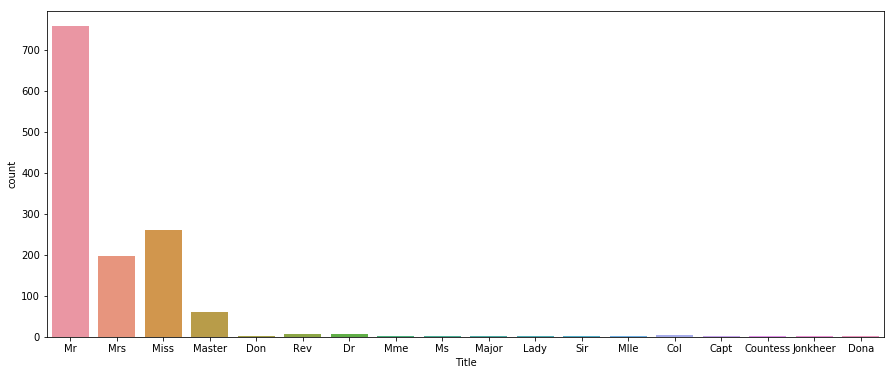

In [122]:
plt.figure(figsize=(15,6))
sns.countplot(x='Title', data=df)

**Observation** : *Above plot displays the count for each title in the dataset.*

In [123]:
df['Title'] = df['Title'].replace({'Don':'Special','Rev':'Special','Dr':'Special','Mme':'Mrs','Ms':'Miss',\
                                   'Major':'Special','Lady':'Special','Sir':'Special','Mlle':'Miss',\
                                   'Col':'Special','Capt':'Special','Countess':'Special','Jonkheer':'Special','Dona':'Special'})

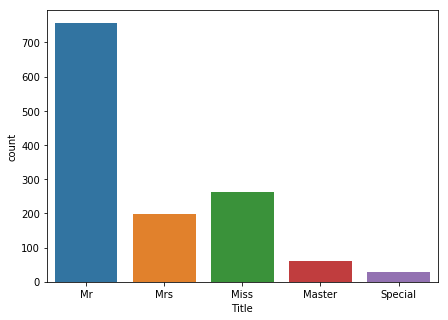

In [124]:
plt.figure(figsize=(7,5))
sns.countplot(x='Title', data=df)

**Observation** : *Above plot displays count for five titles 'Mr.', 'Mrs.', 'Miss.', 'Master.' and 'Special'.*

## Handling Missing Values

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Has_Cabin      1309 non-null bool
Title          1309 non-null object
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 184.5+ KB


**Observation** : *Above information shows that Age, Fare, Cabin and Embarked columns have missing values.*

In [130]:
df.drop(['Cabin'],axis=1, inplace=True)

**Note** : *Above code will drop column 'Cabin' because we have already extracted information on whether the passenger had a cabin or not in 'Has_Cabin' column.*

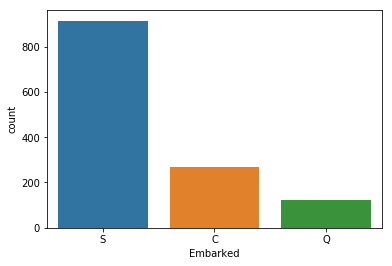

In [132]:
sns.countplot(x='Embarked', data=df)

**Observation** : *Above plot shows that Embarked with value 'S' which is Southampton is the most common value in the dataset.*

In [133]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [134]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [135]:
df['Embarked'] = df['Embarked'].fillna('S')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Has_Cabin      1309 non-null bool
Title          1309 non-null object
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 174.2+ KB


In [137]:
df['Categorical_Age'] = pd.qcut(df['Age'], q=4, labels=False )

In [138]:
df['Categorical_Fare']= pd.qcut(df['Fare'], q=4, labels=False)

In [139]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Title,Categorical_Age,Categorical_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr,2,1


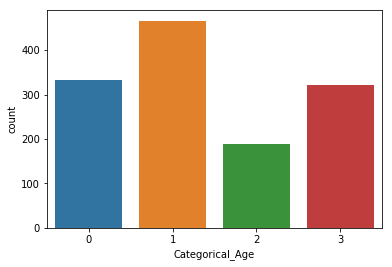

In [140]:
sns.countplot(x='Categorical_Age', data=df)

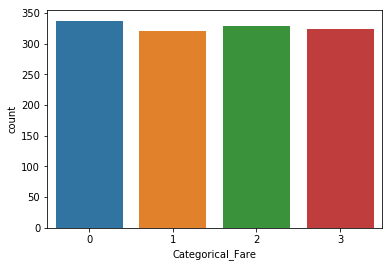

In [141]:
sns.countplot(x='Categorical_Fare', data=df)

In [144]:
df=df.drop(['Name','PassengerId','Ticket','Age','Fare','SibSp','Parch'], axis=1)

In [145]:
df.head()

,Survived,Pclass,Sex,Embarked,Has_Cabin,Title,Categorical_Age,Categorical_Fare
0,0.0,3,male,S,False,Mr,0,0
1,1.0,1,female,C,True,Mrs,3,3
2,1.0,3,female,S,False,Miss,1,1
3,1.0,1,female,S,True,Mrs,2,3
4,0.0,3,male,S,False,Mr,2,1


### Transform Variables into Numerical Variables

In [155]:
data=pd.get_dummies(df)

In [156]:
data.head()

,Survived,Pclass,Has_Cabin,Categorical_Age,Categorical_Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0.0,3,False,0,0,0,1,0,0,1,0,0,1,0,0
1,1.0,1,True,3,3,1,0,1,0,0,0,0,0,1,0
2,1.0,3,False,1,1,1,0,0,0,1,0,1,0,0,0
3,1.0,1,True,2,3,1,0,0,0,1,0,0,0,1,0
4,0.0,3,False,2,1,0,1,0,0,1,0,0,1,0,0


## Preparing the Data 

In [157]:
x=data[['Pclass','Has_Cabin','Categorical_Age','Categorical_Fare','Sex_female','Sex_male','Embarked_C',\
          'Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Special']]
y=data['Survived']

In [158]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Training

In [162]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(solver='lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [163]:
Y_pred=classifier.predict(X_test)

## Accuracy Score

In [170]:
import sklearn
sklearn.metrics.accuracy_score(Y_test, Y_pred)

0.6870229007633588